<a href="https://colab.research.google.com/github/DaanMoura/AprendizadoDeMaquina/blob/main/trabalho2/AM_Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import secrets
from prettytable import PrettyTable

In [2]:
numbers_df = pd.read_csv("https://media.githubusercontent.com/media/DaanMoura/AprendizadoDeMaquina/main/trabalho2/data/numbers.csv")

In [6]:
numbers_df.tail(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
69990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
69999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [5]:
numbers_df.drop(['label'], axis=1, inplace=True)

KeyError: ignored

In [7]:
numbers_df['pixel783'] = 0
numbers = numbers_df.to_numpy()
len(numbers)

70000

In [8]:
def to_binary(image):
  out = image.copy()
  for i in range(len(image)):
    if (image[i] > 0):
        out[i] = 255
    else:
        out[i] = 0
  return out
      

In [9]:
bin_numbers = numbers.copy()
for i in range(len(numbers)):
  if i % 10000 == 0:
    print('passando por ', i)
  bin_numbers[i] = to_binary(numbers[i])

passando por  0
passando por  10000
passando por  20000
passando por  30000
passando por  40000
passando por  50000
passando por  60000


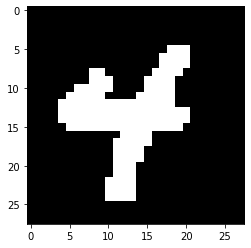

In [10]:
plt.imshow(bin_numbers[2310].reshape(28,28), cmap = 'gray')

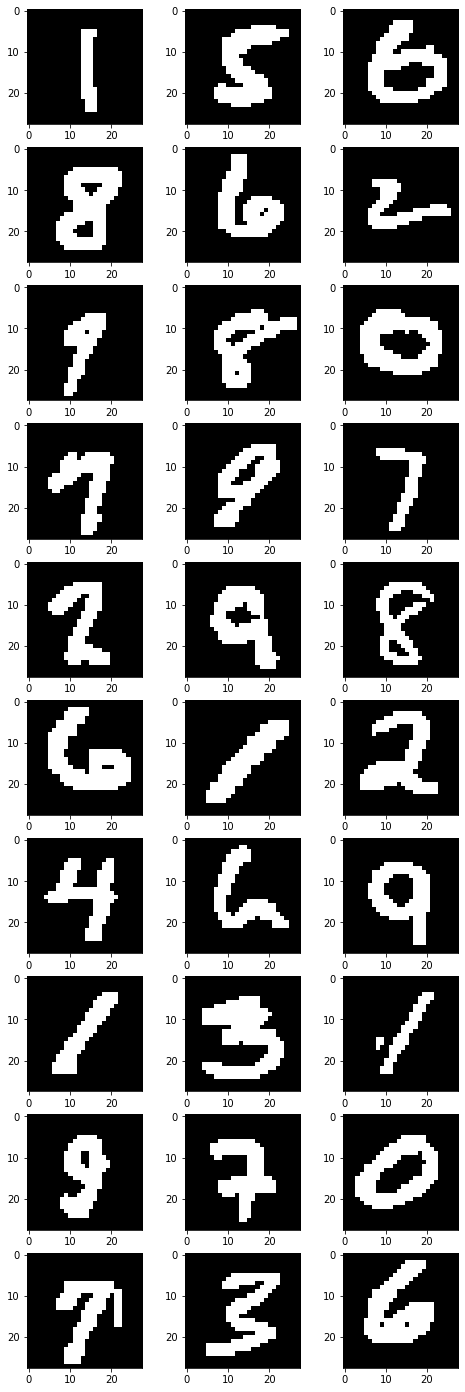

In [ ]:
plt.figure(figsize=[25, 25])
for i in range (1, 11):
  for j in range (1, 4):
    plt.subplot(10, 9, (i-1)* 9 + j) 
    plt.imshow(bin_numbers[secrets.choice(list(range(70000)))].reshape(28,28), cmap = 'gray')

In [12]:
reduced_data = PCA(n_components=2).fit_transform(numbers)
print(reduced_data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

[[ 7.67617518e+02 -4.04229487e+01]
 [ 1.13605034e+03 -6.09804902e-01]
 [-4.98304419e+02  1.09759531e+01]
 ...
 [ 4.67065441e+02  8.97882918e+02]
 [ 2.91861536e+02 -2.03261705e-01]
 [-3.21553100e+02  4.49520126e+02]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=4, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
kmeans.n_clusters

10

In [15]:
kmeans.cluster_centers_

array([[-223.43553727, -379.71081106],
       [ 110.1957519 ,   -4.07765248],
       [-289.57598652,  574.95303789],
       [1348.49437349, -191.13402735],
       [-522.19458798,  108.04657531],
       [ 220.45878385, -700.6070863 ],
       [ 172.66030514,  813.54019316],
       [-818.89597407, -435.72124239],
       [ 642.38291314,  257.5480364 ],
       [ 645.30371967, -314.1207668 ]])

In [23]:
x = []
y = []
for i in kmeans.cluster_centers_:
  x.append(i[0])
  y.append(i[1])


In [28]:
k = []
z = []
for i in reduced_data:
  k.append(i[0])
  z.append(i[1])


In [24]:
x

[-223.4355372676191,
 110.19575189916212,
 -289.57598652485865,
 1348.4943734894528,
 -522.1945879804161,
 220.45878384718546,
 172.6603051365886,
 -818.8959740698712,
 642.3829131362239,
 645.3037196685286]

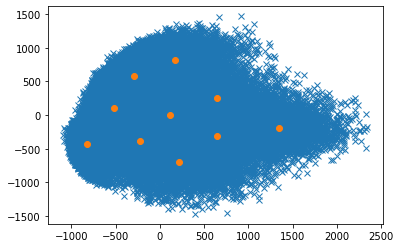

In [32]:
plt.plot(k,z,'x')
plt.plot(x,y,'o') 

In [33]:
kmeans.

10

In [27]:
reduced_data

array([[ 7.67617518e+02, -4.04229487e+01],
       [ 1.13605034e+03, -6.09804902e-01],
       [-4.98304419e+02,  1.09759531e+01],
       ...,
       [ 4.67065441e+02,  8.97882918e+02],
       [ 2.91861536e+02, -2.03261705e-01],
       [-3.21553100e+02,  4.49520126e+02]])

array([9, 3, 4, ..., 6, 1, 2], dtype=int32)

In [ ]:
reduced_data[0]

array([767.61604753, -40.41495553])